In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(1, r'C:\Users\jv97\Desktop\github\Neutrino-Machine-Learning')

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from iminuit import Minuit
import FunctionCollection as fc
import importlib
import quadpy
from scipy.special import erf
from scipy.integrate import quad_vec
import sympy
fc = importlib.reload(fc)
from tqdm import tqdm
from scipy.stats import norm
import time

In [12]:
pred_path = r'C:\Users\jv97\Desktop\github\Neutrino-Machine-Learning\predictions'

# df = pd.read_csv(os.path.join(pred_path,'OscNext_EAngle_m27_2kql_test_predictions.csv'))
df = pd.read_csv(os.path.join(pred_path,'OscNext_ZeE_m27_3f6o_test_predictions.csv'))
# df = pd.read_csv(os.path.join(pred_path,'OscNext_Angle_m27_23ge_test_predictions.csv'))
# df = pd.read_csv(os.path.join(pred_path,'Muon_EAngle_m27_3dj6_test_predictions.csv'))
df.head()

,Unnamed: 0,event_no,energy_log10_pred,zenith_pred,energy_log10_sig,zenith_kap
0,0,13188815.0,1.502312,1.130139,0.252136,17.168309
1,1,13188840.0,1.925390,0.990469,0.364942,5.138604
2,2,13188844.0,1.760071,0.944378,0.311438,5.359841
3,3,13188911.0,1.543279,1.332838,0.425745,4.854274
4,4,13189105.0,1.356978,1.324098,0.371058,3.186466


In [16]:
df2 = pd.read_csv(os.path.join(pred_path,'OscNext_EAngle_m27_2kql_test_predictions.csv'))
df2.head()

,Unnamed: 0,Unnamed: 0.1,event_no,energy_log10,azimuth,zenith,x,y,z,energy_log10_pred,...,x_pred,y_pred,z_pred,energy_log10_sig,x_sig,y_sig,z_sig,solid_angle_sig,azimuth_sig,zenith_sig
0,0,0,27026074.0,2.339276,5.965024,0.951963,0.773675,-0.254810,0.580085,1.547945,...,0.548011,0.555191,0.313247,0.266775,0.299112,0.317034,0.287479,0.365083,0.394933,0.345524
1,1,1,18018600.0,2.291836,0.055570,0.956157,0.815720,0.045376,0.576664,1.945694,...,0.290151,0.162443,0.474449,0.386483,0.435394,0.544824,0.352092,0.779818,1.566189,0.742628
2,2,2,21018872.0,2.361583,4.538415,0.831754,-0.127939,-0.727957,0.673581,1.367079,...,0.676238,0.183609,0.269970,0.377416,0.293216,0.467504,0.391498,0.574829,0.653133,0.508399
3,3,3,72065686.0,2.356631,4.418117,1.123479,-0.261506,-0.862854,0.432548,1.786912,...,0.077208,-0.358601,0.548460,0.249609,0.425867,0.510846,0.400673,0.708710,1.172210,0.722861
4,4,4,78067166.0,2.360585,4.256743,0.958790,-0.360174,-0.734991,0.574511,1.593515,...,-0.495322,-0.215512,0.485777,0.474106,0.430097,0.467101,0.364159,0.634633,0.854184,0.547827


In [35]:
from scipy.special import iv

In [92]:
kappa = df.zenith_kap**2 + 1e-5
# sigma = np.sqrt(-2*np.log((1 + np.exp(-2*kappa))/(1 - np.exp(-2*kappa)) - 1/kappa))
sigma = np.sqrt(-2*np.log(iv(1,kappa)/(iv(0,kappa))))

In [93]:
from scipy.special import iv

def approx(x):
    x=np.array(x)
    a=1-3/(8*x)
    b=1+1/(8*x)
    return a/b

def kap_to_sig(kappa):
#     kappa =  kappa**2 + 1e-100
    kappa =  kappa + 1e-100
    sigs=np.where(kappa>700, np.sqrt(abs(np.sqrt(-2*np.log(approx(kappa))))), np.sqrt(abs(np.sqrt(-2*np.log(iv(1,kappa)/iv(0,kappa))))))
    return sigs**2

sigs = kap_to_sig(kappa)


C:\Users\jv97\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':


In [73]:
df2.set_index('event_no').loc[df.event_no].zenith.reset_index()

,event_no,zenith
0,13188815.0,0.884398
1,13188840.0,0.919793
2,13188844.0,1.084221
3,13188911.0,1.054799
4,13189105.0,0.945767
...,...,...
1658357,13168513.0,0.682694
1658358,13171849.0,1.978990
1658359,13172518.0,1.241440
1658360,13172584.0,1.160823


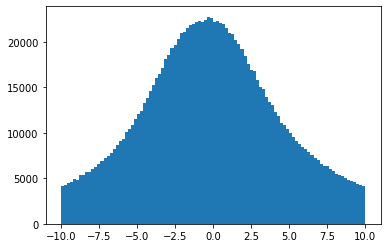

In [94]:
fig, ax = plt.subplots()
ax.hist((df.zenith_pred - zenith.zenith)/sigs,bins=100,range=(-10,10));

In [74]:
zenith = df2.set_index('event_no').loc[df.event_no].zenith.reset_index()

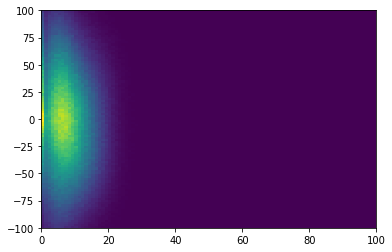

In [95]:
fig, ax = plt.subplots()
ax.hist2d(sigs*180/np.pi,(df.zenith_pred - zenith.zenith)*180/np.pi,bins=100,range=((0,100),(-100,100)));

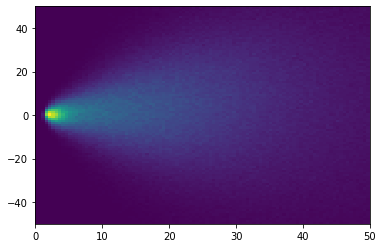

In [8]:
fig, ax = plt.subplots()
ax.hist2d(df.zenith_sig*180/np.pi,(df.zenith_pred - df.zenith)*180/np.pi,bins=100,range=((0,50),(-50,50)));

In [102]:
(df2.zenith_sig*180/np.pi<10).sum()/df2.__len__()

0.10582128630540256

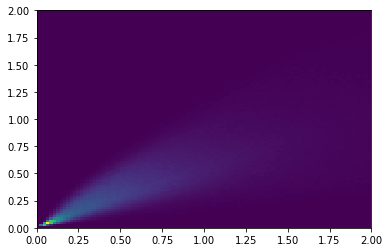

In [11]:
fig, ax = plt.subplots()
ax.hist2d(df.azimuth_sig,df.zenith_sig,range=((0,2),(0,2)),bins=100);

In [4]:
sets = pd.read_pickle(r'C:\Users\jv97\Desktop\github\Neutrino-Machine-Learning\raw_data\rasmus_classification_muon_1500k_sets.pkl')
# sets = pd.read_pickle(r'C:\Users\jv97\Desktop\github\Neutrino-Machine-Learning\raw_data\dev_lvl7_mu_nu_e_classification_v003_unscaled_sets.pkl')

dataset = fc.custom_db_dataset(filepath = r'C:\Users\jv97\Desktop\github\Neutrino-Machine-Learning\raw_data',
                               filename = 'rasmus_classification_muon_1500k.db',
#                                filename = 'dev_lvl7_mu_nu_e_classification_v003_unscaled.db',
                               features = 'charge_log10',
                               targets = 'event_no, azimuth, zenith',
                               TrTV = (0.5,0.75,1),
                               event_nos = np.array(sets['test']),
#                                event_nos = sets['test'].to_numpy().reshape(-1),
#                                x_transform = x_transform,
#                                y_transform = y_transform,
#                                batch_transform = batch_transform,
#                                Data_constructor = Data_constructor,
                               shuffle = False,
                               SRT_clean = False,
                              #  reweighter = ze_reweighter
                               )

In [17]:
np.arange(int(1.5e5))[np.array(sets['test']) == 138674889], dataset[472].y

(array([472]),
 tensor([[1.3867e+08, 1.1083e-01, 4.3540e-02]], dtype=torch.float64))

In [18]:
tmp = pd.DataFrame(dataset[472].y.view(1,3).numpy(),columns=['event_no','azimuth','zenith'])
y_centers = pd.DataFrame({'energy_log10': [2.28962877],
                          'azimuth': [3.17179598],
                          'zenith': [0.99478726],
                          'direction_x': [-0.0090638],
                          'direction_y': [0.00708907],
                          'direction_z': [-0.54468131],
                          'event_no': [0]})
y_scalers = pd.DataFrame({'energy_log10': [1.03477065],
                          'azimuth': [3.18754927],
                          'zenith': [1.11991644],
                          'direction_x': [0.80913804],
                          'direction_y': [0.81531021],
                          'direction_z': [0.96191438],
                          'event_no': [1]})

y_centers = y_centers[['event_no','azimuth','zenith']].values
y_scalers = y_scalers[['event_no','azimuth','zenith']].values

# def y_transform(df):
#     df = df*y_scalers + y_centers
#     return df

def y_transform(df):
    import torch
    df = df*y_scalers + y_centers
    print(df)

#     E = torch.tensor(df.energy_log10).unsqueeze(1)
    cos_az = torch.cos(torch.tensor(df.azimuth)).unsqueeze(1)
    sin_az = torch.sin(torch.tensor(df.azimuth)).unsqueeze(1)
    cos_ze = torch.cos(torch.tensor(df.zenith)).unsqueeze(1)
    sin_ze = torch.sin(torch.tensor(df.zenith)).unsqueeze(1)
    return torch.cat([cos_az*sin_ze, sin_az*sin_ze, cos_ze],dim=1)

r = y_transform(tmp)

def vec_to_solid(pred,truth):
    return np.arccos((pred*truth).sum(1)/np.linalg.norm(pred,axis=1))

def vec_to_az(pred):
    return np.arctan2(pred[:,1],pred[:,0])

def vec_to_ze(pred):
    return np.arccos(pred[:,2]/np.linalg.norm(pred,axis=1))

vec_to_az(r.numpy())%(2*np.pi)

      event_no   azimuth    zenith
0  138674889.0  3.525079  1.043548


array([3.52507872])

In [20]:
tf = pd.read_pickle(r'C:\Users\jv97\Desktop\github\Neutrino-Machine-Learning\datasets\transformers.pkl')
for key in tf['truth']:
    print(key, tf['truth'][key].center_, tf['truth'][key].scale_)

energy_log10 [2.28962877] [1.03477065]
time [9081.03008878] [1936.88668241]
direction_x [-0.0090638] [0.80913804]
direction_y [0.00708907] [0.81531021]
direction_z [-0.54468131] [0.96191438]
position_x [39.97712018] [232.3541022]
position_y [-36.69148366] [215.38276592]
position_z [-185.19041083] [1170.30016033]
azimuth [3.17179598] [3.18754927]
zenith [0.99478726] [1.11991644]


$$ \Omega = arccos( \frac{p \cdot t}{|p|}) $$

$$ \phi = arctan( \frac{p_y}{p_x} ) $$

$$ \theta = arccos( \frac{p_z}{|p|} ) $$

In [3]:
x = sympy.symbols('x')
y = sympy.symbols('y')
z = sympy.symbols('z')

sx = sympy.symbols('\sigma_x')
sy = sympy.symbols('\sigma_y')
sz = sympy.symbols('\sigma_z')

t_x = sympy.symbols('t_x')
t_y = sympy.symbols('t_y')
t_z = sympy.symbols('t_z')

p = sympy.sqrt(x**2 + y**2 + z**2)

In [4]:
omega = sympy.acos((x*t_x+y*t_y+z*t_z)/p)
phi = sympy.atan2(y,x)
theta = sympy.acos(z/p)

In [5]:
def error_prop(expr):
    from sympy import sqrt, diff
    return sqrt((diff(expr,x)*sx)**2 + (diff(expr,y)*sy)**2 + (diff(expr,z)*sz)**2)

s_omega = error_prop(omega).simplify()
s_phi = error_prop(phi).simplify()
s_theta = error_prop(theta).simplify()

In [6]:
s_theta

sqrt((\sigma_z**2*(x**2 + y**2)**2 + z**2*(\sigma_x**2*x**2 + \sigma_y**2*y**2))/((x**2 + y**2)*(x**2 + y**2 + z**2)**2))

In [7]:
func_omega = sympy.lambdify([x,y,z,t_x,t_y,t_z,sx,sy,sz],s_omega)
func_phi = sympy.lambdify([x,y,sx,sy],s_phi)
func_theta = sympy.lambdify([x,y,z,sx,sy,sz],s_theta)

In [8]:
solid_angle_sig = func_omega(df.x_pred,df.y_pred,df.z_pred,df.x,df.y,df.z,df.x_sig,df.y_sig,df.z_sig)
azimuth_sig = func_phi(df.x_pred,df.y_pred,df.x_sig,df.y_sig)
zenith_sig = func_theta(df.x_pred,df.y_pred,df.z_pred,df.x_sig,df.y_sig,df.z_sig)

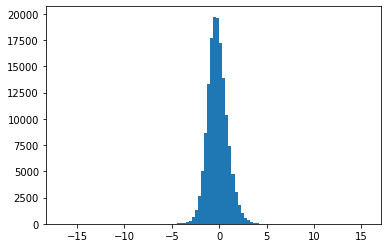

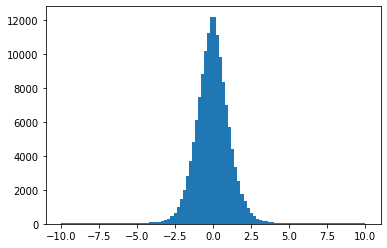

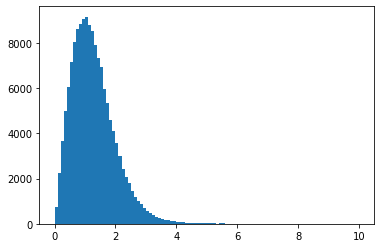

In [9]:
fig, ax = plt.subplots()
ax.hist((df.zenith_pred-df.zenith)/zenith_sig,bins=100);

fig, ax = plt.subplots()
ax.hist((df.azimuth_pred-df.azimuth)/azimuth_sig,bins=100,range=(-10,10));

fig, ax = plt.subplots()
ax.hist((df.solid_angle)/solid_angle_sig,bins=100,range=(0,10));

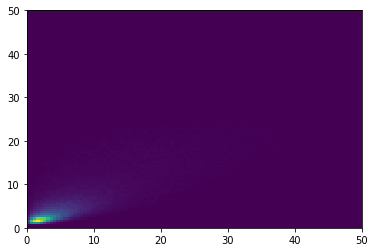

In [10]:
fig, ax = plt.subplots()
ax.hist2d(df.solid_angle*180/np.pi,solid_angle_sig*180/np.pi,bins=100,range=((0,50),(0,50)));

In [11]:
df['solid_angle_sig'] = solid_angle_sig
df['azimuth_sig'] = azimuth_sig
df['zenith_sig'] = zenith_sig


In [14]:
print("REMEMBER TO CHANGE FILENAME")
# df.to_csv(r"C:\Users\jv97\Desktop\github\Neutrino-Machine-Learning\predictions\Muon_EAngle_m27_3dj6_test_predictions.csv")

REMEMBER TO CHANGE FILENAME
